In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Configure image format to be ‘svg’
%config InlineBackend.figure_format = 'svg'

# allow visuals to render within notebook
%matplotlib inline 

In [2]:
# Make some room to see stuff (i.e. drop display limits on Pandas rows & cols - be careful w/ big df's!)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## 1. Read in the "daily_per_complex" dataframe csvs previously generated

In [3]:
daily_per_complex_2019 = pd.read_csv('daily_per_complex_2019.csv')
print(daily_per_complex_2019.shape)
display(daily_per_complex_2019.head(2))
daily_per_complex_2019.tail(2)

(25567, 20)


,COMPLEX_ID,DATE,NET_DAILY_STATION_ENTRIES,STATION_x,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,BOROUGH,WEEKDAY,DESC,GTFS_LATITUDE,GTFS_LONGITUDE,LINE,REMOTE,BOOTH,SCP,ID,ZIPCODE
0,1,2019-05-01,18999,DITMARS BL-31 S,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,Q,1,REGULAR,40.775036,-73.912034,Astoria,R095,R515,00-00-00,R515 - R095 - 00-00-00,11101
1,1,2019-05-02,19257,DITMARS BL-31 S,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,Q,1,REGULAR,40.775036,-73.912034,Astoria,R095,R515,00-00-00,R515 - R095 - 00-00-00,11101


,COMPLEX_ID,DATE,NET_DAILY_STATION_ENTRIES,STATION_x,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,BOROUGH,WEEKDAY,DESC,GTFS_LATITUDE,GTFS_LONGITUDE,LINE,REMOTE,BOOTH,SCP,ID,ZIPCODE
25565,99,2019-06-29,3587,LORIMER ST,LORIMER ST,Lorimer St,JM,JM,BMT,Bk,0,REGULAR,40.703869,-73.947408,Jamaica,R353,J005,00-00-00,J005 - R353 - 00-00-00,11207
25566,99,2019-06-30,3284,LORIMER ST,LORIMER ST,Lorimer St,JM,JM,BMT,Bk,0,REGULAR,40.703869,-73.947408,Jamaica,R353,J005,00-00-00,J005 - R353 - 00-00-00,11207


In [4]:
daily_per_complex_2021 = pd.read_csv('daily_per_complex_2021.csv')
print(daily_per_complex_2021.shape)
display(daily_per_complex_2021.head(2))
daily_per_complex_2021.tail(2)

(25615, 20)


,COMPLEX_ID,DATE,NET_DAILY_STATION_ENTRIES,STATION_x,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,BOROUGH,WEEKDAY,DESC,GTFS_LATITUDE,GTFS_LONGITUDE,LINE,REMOTE,BOOTH,SCP,ID,ZIPCODE
0,1,2021-05-01,3485,DITMARS BL-31 S,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,Q,0,REGULAR,40.775036,-73.912034,Astoria,R095,R515,00-00-00,R515 - R095 - 00-00-00,11101
1,1,2021-05-02,2378,DITMARS BL-31 S,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,Q,0,REGULAR,40.775036,-73.912034,Astoria,R095,R515,00-00-00,R515 - R095 - 00-00-00,11101


,COMPLEX_ID,DATE,NET_DAILY_STATION_ENTRIES,STATION_x,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,BOROUGH,WEEKDAY,DESC,GTFS_LATITUDE,GTFS_LONGITUDE,LINE,REMOTE,BOOTH,SCP,ID,ZIPCODE
25613,99,2021-06-29,1542,LORIMER ST,LORIMER ST,Lorimer St,JM,JM,BMT,Bk,1,REGULAR,40.703869,-73.947408,Jamaica,R353,J005,00-00-00,J005 - R353 - 00-00-00,11207
25614,99,2021-06-30,1669,LORIMER ST,LORIMER ST,Lorimer St,JM,JM,BMT,Bk,1,REGULAR,40.703869,-73.947408,Jamaica,R353,J005,00-00-00,J005 - R353 - 00-00-00,11207


#### Let's expland out the BOROUGH column into the full names

In [5]:
boroughs = {'Bk': 'Brooklyn', 'Bx': 'Bronx', 'M': 'Manhattan', 'Q': 'Queens'}

daily_per_complex_2019['BOROUGH'] = daily_per_complex_2019['BOROUGH'].map(boroughs)
daily_per_complex_2021['BOROUGH'] = daily_per_complex_2021['BOROUGH'].map(boroughs)

display(daily_per_complex_2019['BOROUGH'].sample(10))
display(daily_per_complex_2021['BOROUGH'].sample(10))

11252    Manhattan
9300        Queens
13052     Brooklyn
18315    Manhattan
3663      Brooklyn
7268      Brooklyn
16543    Manhattan
8776        Queens
20294    Manhattan
12336    Manhattan
Name: BOROUGH, dtype: object

6488     Manhattan
8889        Queens
14139        Bronx
9036        Queens
1851      Brooklyn
17657        Bronx
8557        Queens
14864        Bronx
13168     Brooklyn
6683     Manhattan
Name: BOROUGH, dtype: object

## 2. Calculate 'MEDIAN_DAILY_ENTRIES' per Station
### 2a) Start with the overall 2019 datasets for weekdays and for weekends

In [6]:
median_busiest_2019_weekdays = daily_per_complex_2019 \
             .groupby(['COMPLEX_ID', 'STATION_x', 'BOROUGH']).first() \
             .reset_index().drop(columns=['DATE', 'DESC', 'NET_DAILY_STATION_ENTRIES', 'GTFS_LATITUDE',
                                          'GTFS_LONGITUDE', 'REMOTE', 'BOOTH', 'SCP', 'ID'])
median_busiest_2019_weekdays.loc[:, 'WEEKDAY'] = 1
median_busiest_2019_weekdays.shape

(421, 11)

In [7]:
# The same struture will apply to both dataframes ('MEDIAN_DAILY_ENTRIES' column not added yet)

median_busiest_2019_weekends = median_busiest_2019_weekdays.copy(deep=True)
median_busiest_2019_weekends.loc[:, 'WEEKDAY'] = 0

# Station '5 AVE-BRYANT PK' has no weekend traffic, so it must be removed
#   (was not found in the 2021 data either - part of the 609 Complex that was apparently not
#    operating in 2021, even on weekdays); so, we will remove this station from 2019 weekdays data, too:

median_busiest_2019_weekdays = \
             median_busiest_2019_weekdays[median_busiest_2019_weekdays['STATION_x'] != '5 AVE-BRYANT PK'] \
                                        .reset_index(drop=True)
print(median_busiest_2019_weekdays.shape)

median_busiest_2019_weekends = \
             median_busiest_2019_weekends[median_busiest_2019_weekends['STATION_x'] != '5 AVE-BRYANT PK'] \
                                        .reset_index(drop=True)
median_busiest_2019_weekends.shape

(420, 11)


(420, 11)

In [8]:
daily_per_complex_2019 = daily_per_complex_2019[daily_per_complex_2019['STATION_x'] != '5 AVE-BRYANT PK'] \
                                        .reset_index(drop=True)

median_busiest_2019_weekdays['MEDIAN_DAILY_ENTRIES'] = \
               daily_per_complex_2019[daily_per_complex_2019['WEEKDAY'] == 1] \
                         .groupby(['COMPLEX_ID', 'STATION_x', 'BOROUGH'])['NET_DAILY_STATION_ENTRIES'] \
                         .median().values

In [9]:
median_busiest_2019_weekends['MEDIAN_DAILY_ENTRIES'] = \
             daily_per_complex_2019[daily_per_complex_2019['WEEKDAY'] == 0] \
                         .groupby(['COMPLEX_ID', 'STATION_x', 'BOROUGH'])['NET_DAILY_STATION_ENTRIES'] \
                         .median().values

#### Now Sort descending by MEDIAN_DAILY ENTRIES

In [10]:
median_busiest_2019_weekdays.sort_values(by='MEDIAN_DAILY_ENTRIES', ascending=False, inplace=True)
display(median_busiest_2019_weekdays.head())
display(median_busiest_2019_weekdays.tail())

,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,MEDIAN_DAILY_ENTRIES
398,611,42 ST-PA BUS TE,Manhattan,42 ST-PORT AUTH,42 St - Port Authority Bus Terminal,ACENQRS1237,ACENQRS1237W,IND,1,8th Av - Fulton St,10036,310368.0
397,610,42 ST-GRD CNTRL,Manhattan,GRD CNTRL-42 ST,Grand Central - 42 St,4567S,4567S,IRT,1,Lexington Av,10017,254106.0
410,623,MURRAY ST-B'WAY,Manhattan,CITY HALL,Canal St,R,NRW,BMT,1,Broadway,10003,151440.0
389,602,14 ST-UNION SQ,Manhattan,14 ST-UNION SQ,14 St - Union Sq,LNQR456,LNQR456W,BMT,1,Broadway - Brighton,10003,114200.0
411,624,PARK PLACE,Manhattan,PARK PLACE,Park Pl,23ACE,23ACE,IRT,1,Clark St,10007,104004.0


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,MEDIAN_DAILY_ENTRIES
163,206,BEACH 44 ST,Queens,BEACH 44 ST,Beach 44 St,A,A,IND,1,Rockaway,11692,714.0
160,203,ROCKAWAY PK 116,Queens,ROCKAWAY PARK B,Rockaway Park - Beach 116 St,AS,AS,IND,1,Rockaway,11694,671.0
158,201,BEACH 98 ST,Queens,BEACH 98 ST,Beach 98 St,AS,AS,IND,1,Rockaway,11693,496.0
156,199,BROAD CHANNEL,Queens,BROAD CHANNEL,Broad Channel,AS,AS,IND,1,Rockaway,11693,340.0
159,202,BEACH 105 ST,Queens,BEACH 105 ST,Beach 105 St,AS,AS,IND,1,Rockaway,11693,244.0


In [11]:
median_busiest_2019_weekends.sort_values(by='MEDIAN_DAILY_ENTRIES', ascending=False, inplace=True)
display(median_busiest_2019_weekends.head())
display(median_busiest_2019_weekends.tail())

,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,MEDIAN_DAILY_ENTRIES
398,611,42 ST-PA BUS TE,Manhattan,42 ST-PORT AUTH,42 St - Port Authority Bus Terminal,ACENQRS1237,ACENQRS1237W,IND,0,8th Av - Fulton St,10036,181396.5
397,610,42 ST-GRD CNTRL,Manhattan,GRD CNTRL-42 ST,Grand Central - 42 St,4567S,4567S,IRT,0,Lexington Av,10017,136617.0
410,623,MURRAY ST-B'WAY,Manhattan,CITY HALL,Canal St,R,NRW,BMT,0,Broadway,10003,96738.0
389,602,14 ST-UNION SQ,Manhattan,14 ST-UNION SQ,14 St - Union Sq,LNQR456,LNQR456W,BMT,0,Broadway - Brighton,10003,86012.5
394,607,34 ST-HERALD SQ,Manhattan,34 ST-HERALD SQ,34 St - Herald Sq,BDFMNQR,BDFMNQRW,IND,0,6th Av - Culver,10019,54051.5


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,MEDIAN_DAILY_ENTRIES
62,80,121 ST,Queens,121 ST,121 St,JZ,JZ,BMT,0,Jamaica,11418,56.5
67,85,ELDERTS LANE,Queens,75 ST-ELDERTS,75 St,JZ,JZ,BMT,0,Jamaica,11421,43.0
64,82,104 ST,Queens,104 ST,104 St,JZ,JZ,BMT,0,Jamaica,11418,32.5
66,84,FOREST PARKWAY,Queens,85 ST-FOREST PK,85 St - Forest Pkwy,J,J,BMT,0,Jamaica,11421,28.5
68,86,CYPRESS HILLS,Brooklyn,CYPRESS HILLS,Cypress Hills,J,J,BMT,0,Jamaica,11208,14.5


#### Do the same for the 2021 data

In [12]:
median_busiest_2021_weekdays = daily_per_complex_2021 \
             .groupby(['COMPLEX_ID', 'STATION_x', 'BOROUGH']).first() \
             .reset_index().drop(columns=['DATE', 'DESC', 'NET_DAILY_STATION_ENTRIES', 'GTFS_LATITUDE',
                                          'GTFS_LONGITUDE', 'REMOTE', 'BOOTH', 'SCP', 'ID'])
median_busiest_2021_weekdays.loc[:, 'WEEKDAY'] = 1
median_busiest_2021_weekdays.shape

(420, 11)

In [13]:
# The same struture will apply to both dataframes ('MEDIAN_DAILY_ENTRIES' column not added yet)

median_busiest_2021_weekends = median_busiest_2021_weekdays.copy(deep=True)
median_busiest_2021_weekends.loc[:, 'WEEKDAY'] = 0

# Station '5 AVE-BRYANT PK' has no weekend traffic, so it must be removed
median_busiest_2021_weekends = \
             median_busiest_2021_weekends[median_busiest_2021_weekends['STATION_x'] != '5 AVE-BRYANT PK']
median_busiest_2021_weekends.shape

(420, 11)

In [14]:
median_busiest_2021_weekdays['MEDIAN_DAILY_ENTRIES'] = \
               daily_per_complex_2021[daily_per_complex_2021['WEEKDAY'] == 1] \
                         .groupby(['COMPLEX_ID', 'STATION_x', 'BOROUGH'])['NET_DAILY_STATION_ENTRIES'] \
                         .median().values

print(median_busiest_2021_weekdays.shape)
display(median_busiest_2021_weekdays.head())
display(median_busiest_2021_weekdays.tail())

(420, 12)


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,MEDIAN_DAILY_ENTRIES
0,1,DITMARS BL-31 S,Queens,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,1,Astoria,11101,5448.0
1,3,GRAND-30 AVE,Queens,30 AV,30 Av,NQ,NQW,BMT,1,Astoria,11102,4536.0
2,4,BROADWAY-31 ST,Queens,BROADWAY,Broadway,NQ,NQW,BMT,1,Astoria,11101,3867.0
3,5,WASHINGTON-36 A,Queens,36 AV,36 Av,NQ,NQW,BMT,1,Astoria,11106,2228.0
4,6,BEEBE-39 AVE,Queens,39 AV,39 Av,NQ,NQW,BMT,1,Astoria,11101,907.0


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,MEDIAN_DAILY_ENTRIES
415,628,FULTON ST,Manhattan,FULTON ST,Fulton St,ACJZ2345,ACJZ2345,IND,1,8th Av - Fulton St,10279,15652.0
416,629,METROPOLITAN AV,Brooklyn,METROPOLITAN AV,Metropolitan Av,GL,GL,IND,1,Crosstown,11211,4305.0
417,630,MYRTLE AVE,Brooklyn,MYRTLE-WYCKOFF,Myrtle - Wyckoff Avs,LM,LM,BMT,1,Myrtle Av,11385,15584.0
418,635,WHITEHALL ST,Manhattan,WHITEHALL S-FRY,Whitehall St,R1,R1W,BMT,1,Broadway,10004,4277.0
419,636,JAY ST-METROTEC,Brooklyn,JAY ST-METROTEC,Jay St - MetroTech,R,R,BMT,1,Broadway,11201,10035.0


In [15]:
median_busiest_2021_weekends['MEDIAN_DAILY_ENTRIES'] = \
             daily_per_complex_2021[daily_per_complex_2021['WEEKDAY'] == 0] \
                         .groupby(['COMPLEX_ID', 'STATION_x', 'BOROUGH'])['NET_DAILY_STATION_ENTRIES'] \
                         .median().values

print(median_busiest_2021_weekends.shape)
display(median_busiest_2021_weekends.head())
display(median_busiest_2021_weekends.tail())

(420, 12)


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,MEDIAN_DAILY_ENTRIES
0,1,DITMARS BL-31 S,Queens,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,0,Astoria,11101,2898.5
1,3,GRAND-30 AVE,Queens,30 AV,30 Av,NQ,NQW,BMT,0,Astoria,11102,2337.5
2,4,BROADWAY-31 ST,Queens,BROADWAY,Broadway,NQ,NQW,BMT,0,Astoria,11101,2240.0
3,5,WASHINGTON-36 A,Queens,36 AV,36 Av,NQ,NQW,BMT,0,Astoria,11106,1123.0
4,6,BEEBE-39 AVE,Queens,39 AV,39 Av,NQ,NQW,BMT,0,Astoria,11101,395.5


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,MEDIAN_DAILY_ENTRIES
415,628,FULTON ST,Manhattan,FULTON ST,Fulton St,ACJZ2345,ACJZ2345,IND,0,8th Av - Fulton St,10279,5726.0
416,629,METROPOLITAN AV,Brooklyn,METROPOLITAN AV,Metropolitan Av,GL,GL,IND,0,Crosstown,11211,3504.5
417,630,MYRTLE AVE,Brooklyn,MYRTLE-WYCKOFF,Myrtle - Wyckoff Avs,LM,LM,BMT,0,Myrtle Av,11385,9922.0
418,635,WHITEHALL ST,Manhattan,WHITEHALL S-FRY,Whitehall St,R1,R1W,BMT,0,Broadway,10004,2941.0
419,636,JAY ST-METROTEC,Brooklyn,JAY ST-METROTEC,Jay St - MetroTech,R,R,BMT,0,Broadway,11201,5354.0


### 2b) Now create a combined Comparison dataframe from 2019 and 2021 median data

In [16]:
median_busiest_2019_weekdays.rename(columns={'MEDIAN_DAILY_ENTRIES': '2019'}, inplace=True)
median_busiest_2021_weekdays.rename(columns={'MEDIAN_DAILY_ENTRIES': '2021'}, inplace=True)

In [17]:
merging_df = median_busiest_2021_weekdays[['COMPLEX_ID', 'STATION_x', 'BOROUGH', '2021']]

compare_2019_21_weekdays = median_busiest_2019_weekdays.merge(right=merging_df,
                                                              on=['COMPLEX_ID', 'STATION_x', 'BOROUGH'],
                                                              how='left')
del merging_df

In [18]:
print(median_busiest_2019_weekdays.shape)
print(compare_2019_21_weekdays.shape)

# Check for NaNs
print(compare_2019_21_weekdays[compare_2019_21_weekdays.isna().any(axis=1)].shape)

display(compare_2019_21_weekdays.head())
display(compare_2019_21_weekdays.tail())

(420, 12)
(420, 13)
(0, 13)


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,2019,2021
0,611,42 ST-PA BUS TE,Manhattan,42 ST-PORT AUTH,42 St - Port Authority Bus Terminal,ACENQRS1237,ACENQRS1237W,IND,1,8th Av - Fulton St,10036,310368.0,78990.0
1,610,42 ST-GRD CNTRL,Manhattan,GRD CNTRL-42 ST,Grand Central - 42 St,4567S,4567S,IRT,1,Lexington Av,10017,254106.0,87714.0
2,623,MURRAY ST-B'WAY,Manhattan,CITY HALL,Canal St,R,NRW,BMT,1,Broadway,10003,151440.0,42582.0
3,602,14 ST-UNION SQ,Manhattan,14 ST-UNION SQ,14 St - Union Sq,LNQR456,LNQR456W,BMT,1,Broadway - Brighton,10003,114200.0,41741.0
4,624,PARK PLACE,Manhattan,PARK PLACE,Park Pl,23ACE,23ACE,IRT,1,Clark St,10007,104004.0,20254.0


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,2019,2021
415,206,BEACH 44 ST,Queens,BEACH 44 ST,Beach 44 St,A,A,IND,1,Rockaway,11692,714.0,313.0
416,203,ROCKAWAY PK 116,Queens,ROCKAWAY PARK B,Rockaway Park - Beach 116 St,AS,AS,IND,1,Rockaway,11694,671.0,288.0
417,201,BEACH 98 ST,Queens,BEACH 98 ST,Beach 98 St,AS,AS,IND,1,Rockaway,11693,496.0,142.0
418,199,BROAD CHANNEL,Queens,BROAD CHANNEL,Broad Channel,AS,AS,IND,1,Rockaway,11693,340.0,122.0
419,202,BEACH 105 ST,Queens,BEACH 105 ST,Beach 105 St,AS,AS,IND,1,Rockaway,11693,244.0,84.0


#### Repeat the above steps for 2019 & 2021 weekends data

In [19]:
median_busiest_2019_weekends.rename(columns={'MEDIAN_DAILY_ENTRIES': '2019'}, inplace=True)
median_busiest_2021_weekends.rename(columns={'MEDIAN_DAILY_ENTRIES': '2021'}, inplace=True)

In [20]:
merging_df = median_busiest_2021_weekends[['COMPLEX_ID', 'STATION_x', 'BOROUGH', '2021']]

compare_2019_21_weekends = median_busiest_2019_weekends.merge(right=merging_df,
                                                              on=['COMPLEX_ID', 'STATION_x', 'BOROUGH'],
                                                              how='left')
del merging_df

In [21]:
print(median_busiest_2019_weekends.shape)
print(compare_2019_21_weekends.shape)

# Check for NaNs
print(compare_2019_21_weekends[compare_2019_21_weekends.isna().any(axis=1)].shape)

display(compare_2019_21_weekends.head())
display(compare_2019_21_weekends.tail())

(420, 12)
(420, 13)
(0, 13)


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,2019,2021
0,611,42 ST-PA BUS TE,Manhattan,42 ST-PORT AUTH,42 St - Port Authority Bus Terminal,ACENQRS1237,ACENQRS1237W,IND,0,8th Av - Fulton St,10036,181396.5,50053.5
1,610,42 ST-GRD CNTRL,Manhattan,GRD CNTRL-42 ST,Grand Central - 42 St,4567S,4567S,IRT,0,Lexington Av,10017,136617.0,39643.5
2,623,MURRAY ST-B'WAY,Manhattan,CITY HALL,Canal St,R,NRW,BMT,0,Broadway,10003,96738.0,32025.0
3,602,14 ST-UNION SQ,Manhattan,14 ST-UNION SQ,14 St - Union Sq,LNQR456,LNQR456W,BMT,0,Broadway - Brighton,10003,86012.5,28559.5
4,607,34 ST-HERALD SQ,Manhattan,34 ST-HERALD SQ,34 St - Herald Sq,BDFMNQR,BDFMNQRW,IND,0,6th Av - Culver,10019,54051.5,19493.5


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,2019,2021
415,80,121 ST,Queens,121 ST,121 St,JZ,JZ,BMT,0,Jamaica,11418,56.5,603.0
416,85,ELDERTS LANE,Queens,75 ST-ELDERTS,75 St,JZ,JZ,BMT,0,Jamaica,11421,43.0,904.0
417,82,104 ST,Queens,104 ST,104 St,JZ,JZ,BMT,0,Jamaica,11418,32.5,621.5
418,84,FOREST PARKWAY,Queens,85 ST-FOREST PK,85 St - Forest Pkwy,J,J,BMT,0,Jamaica,11421,28.5,936.5
419,86,CYPRESS HILLS,Brooklyn,CYPRESS HILLS,Cypress Hills,J,J,BMT,0,Jamaica,11208,14.5,397.0


### 2b) Add in ZIPCODE-specific 'MEDIAN_INCOME' data (from the US Census Bureau)

In [22]:
median_income_zipcodes = pd.read_csv('median_income_zipcode.csv', 
                                      usecols=['ZIPCODE', 'All Households', 'Families'])
median_income_zipcodes.columns = ['ZIPCODE', 'MEDIAN_INCOME_ALL_ZIP', 'MEDIAN_INCOME_FAMILIES_ZIP']
median_income_zipcodes['ZIPCODE'] = median_income_zipcodes['ZIPCODE'].str.replace('Zip Code ', '')
median_income_zipcodes.head()

,ZIPCODE,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
0,10001,92840,122776
1,10002,36982,40045
2,10003,118161,183787
3,10004,190223,205202
4,10005,189702,241094


In [23]:
compare_2019_21_weekdays['ZIPCODE'].dtype

dtype('int64')

In [24]:
# Convert median_income_zipcodes['ZIPCODE'] to integer values

print(median_income_zipcodes['ZIPCODE'].dtype)
median_income_zipcodes['ZIPCODE'] = median_income_zipcodes['ZIPCODE'].astype('int')
print(median_income_zipcodes['ZIPCODE'].dtype)

object
int64


#### Merge the dataframe above with the medians dataframes

In [25]:
print(compare_2019_21_weekdays.shape)
compare_2019_21_weekdays = compare_2019_21_weekdays.merge(right=median_income_zipcodes, 
                                                          how='left', 
                                                          on='ZIPCODE')
print(compare_2019_21_weekdays.shape)

#Check for NaNs
compare_2019_21_weekdays[compare_2019_21_weekdays.isna().any(axis=1)].shape[0]

(420, 13)
(420, 15)


4

#### Let's investigate these 4 rows with NaNs:

In [26]:
compare_2019_21_weekdays[compare_2019_21_weekdays.isna().any(axis=1)]

,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,2019,2021,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
7,628,FULTON ST,Manhattan,FULTON ST,Fulton St,ACJZ2345,ACJZ2345,IND,1,8th Av - Fulton St,10279,76997.0,15652.0,NaN,NaN
29,622,BROOKLYN BRIDGE,Manhattan,BROOKLYN BRIDGE,Brooklyn Bridge - City Hall,456JZ,456JZ,IRT,1,Lexington Av,10000,29380.0,7227.0,NaN,NaN
45,316,50 ST,Manhattan,50 ST,50 St,1,1,IRT,1,Broadway - 7Av,10107,22960.0,4086.0,NaN,NaN
211,306,125 ST,Manhattan,125 ST,125 St,1,1,IRT,1,Broadway - 7Av,10115,6895.0,2589.0,NaN,NaN


In [27]:
# ZIPCODE 10279 is apparently not in the US Census data; however, 10006 is right next door and is in
#   the Census data, so let's change the zipcode for that station to 10006

print(10279 in median_income_zipcodes['ZIPCODE'].unique())
print(10006 in median_income_zipcodes['ZIPCODE'].unique())

compare_2019_21_weekdays.loc[7,'ZIPCODE'] = 10006
compare_2019_21_weekdays.loc[7,]

False
True


COMPLEX_ID                                   628
STATION_x                              FULTON ST
BOROUGH                                Manhattan
STATION_y                              FULTON ST
STOP_NAME                              Fulton St
LINE_NAME_x                             ACJZ2345
LINE_NAME_y                             ACJZ2345
DIVISION                                     IND
WEEKDAY                                        1
LINE                          8th Av - Fulton St
ZIPCODE                                    10006
2019                                     76997.0
2021                                     15652.0
MEDIAN_INCOME_ALL_ZIP                        NaN
MEDIAN_INCOME_FAMILIES_ZIP                   NaN
Name: 7, dtype: object

In [28]:
# ZIPCODE 10000 does not exist (Geopy blows it again!); checking a map indicates that the Brooklyn Bridge Station
#  is right next to ZIPCODE 10007, so let's change this station's ZIP accordingly

print(10000 in median_income_zipcodes['ZIPCODE'].unique())
print(10007 in median_income_zipcodes['ZIPCODE'].unique())

compare_2019_21_weekdays.loc[29,'ZIPCODE'] = 10007
compare_2019_21_weekdays.loc[29,]

False
True


COMPLEX_ID                                            622
STATION_x                                 BROOKLYN BRIDGE
BOROUGH                                         Manhattan
STATION_y                                 BROOKLYN BRIDGE
STOP_NAME                     Brooklyn Bridge - City Hall
LINE_NAME_x                                         456JZ
LINE_NAME_y                                         456JZ
DIVISION                                              IRT
WEEKDAY                                                 1
LINE                                         Lexington Av
ZIPCODE                                             10007
2019                                              29380.0
2021                                               7227.0
MEDIAN_INCOME_ALL_ZIP                                 NaN
MEDIAN_INCOME_FAMILIES_ZIP                            NaN
Name: 29, dtype: object

In [29]:
# ZIPCODE 10107 is not in the Census data; a map lookup indicates that it's a special carve-out of 
#   ZIPCODE 10019, so we'll change the associated station's zipcode to 10019

print(10107 in median_income_zipcodes['ZIPCODE'].unique())
print(10019 in median_income_zipcodes['ZIPCODE'].unique())

compare_2019_21_weekdays.loc[45,'ZIPCODE'] = 10019
compare_2019_21_weekdays.loc[45,]

False
True


COMPLEX_ID                               316
STATION_x                              50 ST
BOROUGH                            Manhattan
STATION_y                              50 ST
STOP_NAME                              50 St
LINE_NAME_x                                1
LINE_NAME_y                                1
DIVISION                                 IRT
WEEKDAY                                    1
LINE                          Broadway - 7Av
ZIPCODE                                10019
2019                                 22960.0
2021                                  4086.0
MEDIAN_INCOME_ALL_ZIP                    NaN
MEDIAN_INCOME_FAMILIES_ZIP               NaN
Name: 45, dtype: object

In [30]:
# ZIPCODE 10115 is not in the Census data, but 10025 is right next door, so substitute in this value

print(10115 in median_income_zipcodes['ZIPCODE'].unique())
print(10025 in median_income_zipcodes['ZIPCODE'].unique())

compare_2019_21_weekdays.loc[211,'ZIPCODE'] = 10025
compare_2019_21_weekdays.loc[211,]

False
True


COMPLEX_ID                               306
STATION_x                             125 ST
BOROUGH                            Manhattan
STATION_y                             125 ST
STOP_NAME                             125 St
LINE_NAME_x                                1
LINE_NAME_y                                1
DIVISION                                 IRT
WEEKDAY                                    1
LINE                          Broadway - 7Av
ZIPCODE                                10025
2019                                  6895.0
2021                                  2589.0
MEDIAN_INCOME_ALL_ZIP                    NaN
MEDIAN_INCOME_FAMILIES_ZIP               NaN
Name: 211, dtype: object

#### Okay, drop the median income columns and run the merge again

In [31]:
compare_2019_21_weekdays.drop(columns=['MEDIAN_INCOME_ALL_ZIP', 'MEDIAN_INCOME_FAMILIES_ZIP'],
                              inplace=True)

print(compare_2019_21_weekdays.shape)
compare_2019_21_weekdays = compare_2019_21_weekdays.merge(right=median_income_zipcodes, 
                                                          how='left', 
                                                          on='ZIPCODE')
print(compare_2019_21_weekdays.shape)

#Check for NaNs
compare_2019_21_weekdays[compare_2019_21_weekdays.isna().any(axis=1)].shape[0]

(420, 13)
(420, 15)


0

In [32]:
# Great! No NaNs - looks like the merge worked

display(compare_2019_21_weekdays.head())
display(compare_2019_21_weekdays.tail())

,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,2019,2021,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
0,611,42 ST-PA BUS TE,Manhattan,42 ST-PORT AUTH,42 St - Port Authority Bus Terminal,ACENQRS1237,ACENQRS1237W,IND,1,8th Av - Fulton St,10036,310368.0,78990.0,95301,112342
1,610,42 ST-GRD CNTRL,Manhattan,GRD CNTRL-42 ST,Grand Central - 42 St,4567S,4567S,IRT,1,Lexington Av,10017,254106.0,87714.0,131045,218875
2,623,MURRAY ST-B'WAY,Manhattan,CITY HALL,Canal St,R,NRW,BMT,1,Broadway,10003,151440.0,42582.0,118161,183787
3,602,14 ST-UNION SQ,Manhattan,14 ST-UNION SQ,14 St - Union Sq,LNQR456,LNQR456W,BMT,1,Broadway - Brighton,10003,114200.0,41741.0,118161,183787
4,624,PARK PLACE,Manhattan,PARK PLACE,Park Pl,23ACE,23ACE,IRT,1,Clark St,10007,104004.0,20254.0,224063,250001


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,2019,2021,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
415,206,BEACH 44 ST,Queens,BEACH 44 ST,Beach 44 St,A,A,IND,1,Rockaway,11692,714.0,313.0,46819,50516
416,203,ROCKAWAY PK 116,Queens,ROCKAWAY PARK B,Rockaway Park - Beach 116 St,AS,AS,IND,1,Rockaway,11694,671.0,288.0,84485,111046
417,201,BEACH 98 ST,Queens,BEACH 98 ST,Beach 98 St,AS,AS,IND,1,Rockaway,11693,496.0,142.0,60569,66250
418,199,BROAD CHANNEL,Queens,BROAD CHANNEL,Broad Channel,AS,AS,IND,1,Rockaway,11693,340.0,122.0,60569,66250
419,202,BEACH 105 ST,Queens,BEACH 105 ST,Beach 105 St,AS,AS,IND,1,Rockaway,11693,244.0,84.0,60569,66250


#### Now do the same for compare_2019_21_weekends

In [33]:
# Need to change the same 4 zipcodes as above

originals = [10279, 10000, 10107, 10115]
replacements = [10006, 10007, 10019, 10025]

for i, zc in enumerate(originals):
    compare_2019_21_weekends.loc[compare_2019_21_weekends['ZIPCODE'] == zc, 'ZIPCODE'] = replacements[i]

In [34]:
# Now do the merge

print(compare_2019_21_weekends.shape)
compare_2019_21_weekends = compare_2019_21_weekends.merge(right=median_income_zipcodes, 
                                                          how='left', 
                                                          on='ZIPCODE')
print(compare_2019_21_weekends.shape)

#Check for NaNs
compare_2019_21_weekends[compare_2019_21_weekends.isna().any(axis=1)].shape[0]

(420, 13)
(420, 15)


0

In [35]:
# Great! No NaNs - looks like the merge worked

display(compare_2019_21_weekends.head())
display(compare_2019_21_weekends.tail())

,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,2019,2021,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
0,611,42 ST-PA BUS TE,Manhattan,42 ST-PORT AUTH,42 St - Port Authority Bus Terminal,ACENQRS1237,ACENQRS1237W,IND,0,8th Av - Fulton St,10036,181396.5,50053.5,95301,112342
1,610,42 ST-GRD CNTRL,Manhattan,GRD CNTRL-42 ST,Grand Central - 42 St,4567S,4567S,IRT,0,Lexington Av,10017,136617.0,39643.5,131045,218875
2,623,MURRAY ST-B'WAY,Manhattan,CITY HALL,Canal St,R,NRW,BMT,0,Broadway,10003,96738.0,32025.0,118161,183787
3,602,14 ST-UNION SQ,Manhattan,14 ST-UNION SQ,14 St - Union Sq,LNQR456,LNQR456W,BMT,0,Broadway - Brighton,10003,86012.5,28559.5,118161,183787
4,607,34 ST-HERALD SQ,Manhattan,34 ST-HERALD SQ,34 St - Herald Sq,BDFMNQR,BDFMNQRW,IND,0,6th Av - Culver,10019,54051.5,19493.5,103792,176972


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,2019,2021,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
415,80,121 ST,Queens,121 ST,121 St,JZ,JZ,BMT,0,Jamaica,11418,56.5,603.0,68920,72047
416,85,ELDERTS LANE,Queens,75 ST-ELDERTS,75 St,JZ,JZ,BMT,0,Jamaica,11421,43.0,904.0,73107,78779
417,82,104 ST,Queens,104 ST,104 St,JZ,JZ,BMT,0,Jamaica,11418,32.5,621.5,68920,72047
418,84,FOREST PARKWAY,Queens,85 ST-FOREST PK,85 St - Forest Pkwy,J,J,BMT,0,Jamaica,11421,28.5,936.5,73107,78779
419,86,CYPRESS HILLS,Brooklyn,CYPRESS HILLS,Cypress Hills,J,J,BMT,0,Jamaica,11208,14.5,397.0,42403,50726


### 2c) Now generate the per borough median busiest stations for 2019 (weekdays & weekends)

#### Generate the Bronx Medians

In [36]:
compare_2019_21_weekdays_bronx = \
            compare_2019_21_weekdays[compare_2019_21_weekdays['BOROUGH'] == 'Bronx'] \
                                                            .sort_values(by='2019',
                                                                         ascending=False)
print(compare_2019_21_weekdays_bronx.shape)
display(compare_2019_21_weekdays_bronx.head())
display(compare_2019_21_weekdays_bronx.tail())

(68, 15)


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,2019,2021,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
47,604,161 ST-YANKEE,Bronx,161/YANKEE STAD,161 St - Yankee Stadium,BD4,BD4,IND,1,Concourse,10452,22053.0,8915.0,29579,35155
52,434,149 ST-3 AVE,Bronx,3 AV-149 ST,3 Av - 149 St,25,25,IRT,1,Lenox - White Plains Rd,10455,20975.0,8934.0,28585,33920
84,603,149 ST-GR CONC,Bronx,149/GRAND CONC,149 St - Grand Concourse,245,245,IRT,1,Jerome Av,10451,15500.0,6272.0,30349,37332
86,366,E 177 ST-PARKCH,Bronx,PARKCHESTER,Parkchester,6,6,IRT,1,Pelham,10472,15189.0,6581.0,33498,38655
127,213,FORDHAM ROAD,Bronx,FORDHAM RD,Fordham Rd,BD,BD,IND,1,Concourse,10468,11188.0,4726.0,37804,41488


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,2019,2021,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
381,446,MORRIS PARK,Bronx,MORRIS PARK,Morris Park,5,5,IRT,1,Dyre Av,10462,2657.0,1032.0,54278,59538
384,425,BRONX PARK EAST,Bronx,BRONX PARK EAST,Bronx Park East,25,25,IRT,1,Lenox - White Plains Rd,10462,2512.0,1121.0,54278,59538
392,362,MIDDLETOWN ROAD,Bronx,MIDDLETOWN RD,Middletown Rd,6,6,IRT,1,Pelham,10461,2162.0,809.0,58305,68066
398,370,WHITLOCK AVE,Bronx,WHITLOCK AV,Whitlock Av,6,6,IRT,1,Pelham,10459,1842.0,889.0,29284,35536
411,374,E 143 ST,Bronx,E 143/ST MARY'S,E 143 St - St Mary's St,6,6,IRT,1,Pelham,10454,1084.0,568.0,21447,30076


In [37]:
compare_2019_21_weekends_bronx = \
            compare_2019_21_weekends[compare_2019_21_weekends['BOROUGH'] == 'Bronx'] \
                                                            .sort_values(by='2019',
                                                                         ascending=False)
print(compare_2019_21_weekends_bronx.shape)
display(compare_2019_21_weekends_bronx.head())
display(compare_2019_21_weekends_bronx.tail())

(68, 15)


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,2019,2021,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
39,604,161 ST-YANKEE,Bronx,161/YANKEE STAD,161 St - Yankee Stadium,BD4,BD4,IND,0,Concourse,10452,12431.0,6259.5,29579,35155
47,434,149 ST-3 AVE,Bronx,3 AV-149 ST,3 Av - 149 St,25,25,IRT,0,Lenox - White Plains Rd,10455,10993.5,4266.0,28585,33920
92,603,149 ST-GR CONC,Bronx,149/GRAND CONC,149 St - Grand Concourse,245,245,IRT,0,Jerome Av,10451,7477.0,3138.0,30349,37332
112,366,E 177 ST-PARKCH,Bronx,PARKCHESTER,Parkchester,6,6,IRT,0,Pelham,10472,6474.5,3493.5,33498,38655
120,213,FORDHAM ROAD,Bronx,FORDHAM RD,Fordham Rd,BD,BD,IND,0,Concourse,10468,6229.5,2639.0,37804,41488


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,2019,2021,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
389,445,PELHAM PARKWAY,Bronx,PELHAM PKWY,Pelham Pkwy,5,5,IRT,0,Dyre Av,10469,815.5,342.5,65399,73973
396,446,MORRIS PARK,Bronx,MORRIS PARK,Morris Park,5,5,IRT,0,Dyre Av,10462,768.0,276.0,54278,59538
397,370,WHITLOCK AVE,Bronx,WHITLOCK AV,Whitlock Av,6,6,IRT,0,Pelham,10459,716.5,443.0,29284,35536
401,362,MIDDLETOWN ROAD,Bronx,MIDDLETOWN RD,Middletown Rd,6,6,IRT,0,Pelham,10461,656.5,283.0,58305,68066
411,374,E 143 ST,Bronx,E 143/ST MARY'S,E 143 St - St Mary's St,6,6,IRT,0,Pelham,10454,275.5,196.0,21447,30076


#### Generate the Brooklyn Medians

In [38]:
compare_2019_21_weekdays_brooklyn = \
            compare_2019_21_weekdays[compare_2019_21_weekdays['BOROUGH'] == 'Brooklyn'] \
                                                            .sort_values(by='2019',
                                                                         ascending=False)
print(compare_2019_21_weekdays_brooklyn.shape)
display(compare_2019_21_weekdays_brooklyn.head())
display(compare_2019_21_weekdays_brooklyn.tail())

(155, 15)


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,2019,2021,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
8,620,BOROUGH HALL/CT,Brooklyn,BOROUGH HALL,Borough Hall,2345R,2345R,IRT,1,Clark St,11231,62933.0,17319.0,99643,141500
17,617,ATLANTIC AVE,Brooklyn,ATL AV-BARCLAY,Atlantic Av - Barclays Ctr,2345BDNQR,2345BDNQR,IRT,1,Eastern Pky,11217,43052.0,14534.0,119375,145365
21,636,JAY ST-METROTEC,Brooklyn,JAY ST-METROTEC,Jay St - MetroTech,R,R,BMT,1,Broadway,11201,38081.0,10035.0,129248,176004
23,630,MYRTLE AVE,Brooklyn,MYRTLE-WYCKOFF,Myrtle - Wyckoff Avs,LM,LM,BMT,1,Myrtle Av,11385,36348.0,15584.0,75340,76414
40,345,CROWN HTS-UTICA,Brooklyn,CROWN HTS-UTICA,Crown Hts - Utica Av,34,34,IRT,1,Eastern Pky,11213,25148.0,10732.0,44831,51262


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,2019,2021,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
403,141,PARK PLACE,Brooklyn,PARK PLACE,Park Pl,S,S,BMT,1,Franklin Shuttle,11233,1637.0,608.0,44905,48545
406,253,NEPTUNE AVE,Brooklyn,NEPTUNE AV,Neptune Av,F,F,IND,1,6th Av - Culver,11224,1530.0,626.0,32549,43584
407,86,CYPRESS HILLS,Brooklyn,CYPRESS HILLS,Cypress Hills,J,J,BMT,1,Jamaica,11208,1485.0,686.0,42403,50726
409,626,BOTANIC GARDEN,Brooklyn,BOTANIC GARDEN,Botanic Garden,S2345,S2345,BMT,1,Franklin Shuttle,11213,1382.0,491.0,44831,51262
410,247,22 AVE-BAY PKY,Brooklyn,BAY PKWY,Bay Pkwy,F,F,IND,1,6th Av - Culver,11230,1260.0,572.0,53070,66240


In [39]:
compare_2019_21_weekends_brooklyn = \
            compare_2019_21_weekends[compare_2019_21_weekends['BOROUGH'] == 'Brooklyn'] \
                                                            .sort_values(by='2019',
                                                                         ascending=False)
print(compare_2019_21_weekends_brooklyn.shape)
display(compare_2019_21_weekends_brooklyn.head())
display(compare_2019_21_weekends_brooklyn.tail())

(155, 15)


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,2019,2021,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
14,617,ATLANTIC AVE,Brooklyn,ATL AV-BARCLAY,Atlantic Av - Barclays Ctr,2345BDNQR,2345BDNQR,IRT,0,Eastern Pky,11217,21609.5,9923.5,119375,145365
18,630,MYRTLE AVE,Brooklyn,MYRTLE-WYCKOFF,Myrtle - Wyckoff Avs,LM,LM,BMT,0,Myrtle Av,11385,20701.0,9922.0,75340,76414
22,620,BOROUGH HALL/CT,Brooklyn,BOROUGH HALL,Borough Hall,2345R,2345R,IRT,0,Clark St,11231,18753.5,6001.5,99643,141500
29,58,STILLWELL AVE,Brooklyn,CONEY IS-STILLW,Coney Island - Stillwell Av,DFNQ,DFNQ,BMT,0,Sea Beach / West End / Culver / Brighton,11224,15063.0,6586.0,32549,43584
31,120,BEDFORD AVE,Brooklyn,BEDFORD AV,Bedford Av,L,L,BMT,0,Canarsie,11211,14295.5,5151.0,81228,63639


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,2019,2021,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
400,246,AVE I,Brooklyn,AVENUE I,Avenue I,F,F,IND,0,6th Av - Culver,11223,669.5,8.0,54023,65254
402,133,ATLANTIC AVE,Brooklyn,ATLANTIC AV,Atlantic Av,L,L,BMT,0,Canarsie,11207,645.5,299.5,39382,51643
404,253,NEPTUNE AVE,Brooklyn,NEPTUNE AV,Neptune Av,F,F,IND,0,6th Av - Culver,11224,589.5,2.5,32549,43584
405,247,22 AVE-BAY PKY,Brooklyn,BAY PKWY,Bay Pkwy,F,F,IND,0,6th Av - Culver,11230,548.5,0.5,53070,66240
419,86,CYPRESS HILLS,Brooklyn,CYPRESS HILLS,Cypress Hills,J,J,BMT,0,Jamaica,11208,14.5,397.0,42403,50726


#### Generate the Manhattan Medians

In [40]:
compare_2019_21_weekdays_manhattan = \
            compare_2019_21_weekdays[compare_2019_21_weekdays['BOROUGH'] == 'Manhattan'] \
                                                            .sort_values(by='2019',
                                                                         ascending=False)
print(compare_2019_21_weekdays_manhattan.shape)
display(compare_2019_21_weekdays_manhattan.head())
display(compare_2019_21_weekdays_manhattan.tail())

(119, 15)


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,2019,2021,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
0,611,42 ST-PA BUS TE,Manhattan,42 ST-PORT AUTH,42 St - Port Authority Bus Terminal,ACENQRS1237,ACENQRS1237W,IND,1,8th Av - Fulton St,10036,310368.0,78990.0,95301,112342
1,610,42 ST-GRD CNTRL,Manhattan,GRD CNTRL-42 ST,Grand Central - 42 St,4567S,4567S,IRT,1,Lexington Av,10017,254106.0,87714.0,131045,218875
2,623,MURRAY ST-B'WAY,Manhattan,CITY HALL,Canal St,R,NRW,BMT,1,Broadway,10003,151440.0,42582.0,118161,183787
3,602,14 ST-UNION SQ,Manhattan,14 ST-UNION SQ,14 St - Union Sq,LNQR456,LNQR456W,BMT,1,Broadway - Brighton,10003,114200.0,41741.0,118161,183787
4,624,PARK PLACE,Manhattan,PARK PLACE,Park Pl,23ACE,23ACE,IRT,1,Clark St,10007,104004.0,20254.0,224063,250001


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,2019,2021,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
339,220,155 ST,Manhattan,155 ST,155 St,BD,BD,IND,1,Concourse,10039,3509.0,1538.0,42278,44253
348,437,145 ST,Manhattan,145 ST,145 St,3,3,IRT,1,Lenox - White Plains Rd,10037,3305.0,1362.0,46263,51536
362,103,BOWERY,Manhattan,BOWERY,Bowery,JZ,JZ,BMT,1,Jamaica,10002,3139.5,901.0,36982,40045
373,150,155 ST,Manhattan,155 ST,155 St,C,C,IND,1,8th Av - Fulton St,10040,2809.0,1020.0,49677,56530
402,297,215 ST,Manhattan,215 ST,215 St,1,1,IRT,1,Broadway - 7Av,10034,1645.0,682.0,54406,56284


In [41]:
compare_2019_21_weekends_manhattan = \
            compare_2019_21_weekends[compare_2019_21_weekends['BOROUGH'] == 'Manhattan'] \
                                                            .sort_values(by='2019',
                                                                         ascending=False)
print(compare_2019_21_weekends_manhattan.shape)
display(compare_2019_21_weekends_manhattan.head())
display(compare_2019_21_weekends_manhattan.tail())

(119, 15)


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,2019,2021,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
0,611,42 ST-PA BUS TE,Manhattan,42 ST-PORT AUTH,42 St - Port Authority Bus Terminal,ACENQRS1237,ACENQRS1237W,IND,0,8th Av - Fulton St,10036,181396.5,50053.5,95301,112342
1,610,42 ST-GRD CNTRL,Manhattan,GRD CNTRL-42 ST,Grand Central - 42 St,4567S,4567S,IRT,0,Lexington Av,10017,136617.0,39643.5,131045,218875
2,623,MURRAY ST-B'WAY,Manhattan,CITY HALL,Canal St,R,NRW,BMT,0,Broadway,10003,96738.0,32025.0,118161,183787
3,602,14 ST-UNION SQ,Manhattan,14 ST-UNION SQ,14 St - Union Sq,LNQR456,LNQR456W,BMT,0,Broadway - Brighton,10003,86012.5,28559.5,118161,183787
4,607,34 ST-HERALD SQ,Manhattan,34 ST-HERALD SQ,34 St - Herald Sq,BDFMNQR,BDFMNQRW,IND,0,6th Av - Culver,10019,54051.5,19493.5,103792,176972


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,2019,2021,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
326,118,3 AVE,Manhattan,3 AV,3 Av,L,L,BMT,0,Canarsie,10003,1837.0,1382.0,118161,183787
327,220,155 ST,Manhattan,155 ST,155 St,BD,BD,IND,0,Concourse,10039,1833.5,861.5,42278,44253
342,437,145 ST,Manhattan,145 ST,145 St,3,3,IRT,0,Lenox - White Plains Rd,10037,1592.0,671.0,46263,51536
347,326,FRANKLIN ST,Manhattan,FRANKLIN ST,Franklin St,1,1,IRT,0,Broadway - 7Av,10013,1475.5,617.5,113191,163951
403,297,215 ST,Manhattan,215 ST,215 St,1,1,IRT,0,Broadway - 7Av,10034,610.5,362.5,54406,56284


#### Generate the Queens Medians

In [42]:
compare_2019_21_weekdays_queens = \
            compare_2019_21_weekdays[compare_2019_21_weekdays['BOROUGH'] == 'Queens'] \
                                                            .sort_values(by='2019',
                                                                         ascending=False)
print(compare_2019_21_weekdays_queens.shape)
display(compare_2019_21_weekdays_queens.head())
display(compare_2019_21_weekdays_queens.tail())

(78, 15)


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,2019,2021,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
13,447,MAIN ST,Queens,FLUSHING-MAIN,Flushing - Main St,7,7,IRT,1,Flushing,11354,49213.0,22682.0,40786,47405
14,616,ROOSEVELT AVE,Queens,JKSN HT-ROOSVLT,Jackson Hts - Roosevelt Av,EFMR7,EFMR7,IND,1,Queens Blvd,11373,48982.0,21996.0,54584,58918
18,606,COURT SQ,Queens,COURT SQ,Court Sq,7,7,IRT,1,Flushing,11101,40953.0,9692.0,75581,82636
27,278,JAMAICA CENTER,Queens,JAMAICA CENTER,Jamaica Center - Parsons/Archer,EJZ,EJZ,IND,1,Queens - Archer,11433,31836.0,16236.0,54253,65591
33,261,FOREST HILLS-71,Queens,FOREST HILLS 71,Forest Hills - 71 Av,EFMR,EFMR,IND,1,Queens Blvd,11375,26773.0,9767.0,84713,109994


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,2019,2021,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
415,206,BEACH 44 ST,Queens,BEACH 44 ST,Beach 44 St,A,A,IND,1,Rockaway,11692,714.0,313.0,46819,50516
416,203,ROCKAWAY PK 116,Queens,ROCKAWAY PARK B,Rockaway Park - Beach 116 St,AS,AS,IND,1,Rockaway,11694,671.0,288.0,84485,111046
417,201,BEACH 98 ST,Queens,BEACH 98 ST,Beach 98 St,AS,AS,IND,1,Rockaway,11693,496.0,142.0,60569,66250
418,199,BROAD CHANNEL,Queens,BROAD CHANNEL,Broad Channel,AS,AS,IND,1,Rockaway,11693,340.0,122.0,60569,66250
419,202,BEACH 105 ST,Queens,BEACH 105 ST,Beach 105 St,AS,AS,IND,1,Rockaway,11693,244.0,84.0,60569,66250


In [43]:
compare_2019_21_weekends_queens = \
            compare_2019_21_weekends[compare_2019_21_weekends['BOROUGH'] == 'Queens'] \
                                                            .sort_values(by='2019',
                                                                         ascending=False)
print(compare_2019_21_weekends_queens.shape)
display(compare_2019_21_weekends_queens.head())
display(compare_2019_21_weekends_queens.tail())

(78, 15)


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,2019,2021,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
8,616,ROOSEVELT AVE,Queens,JKSN HT-ROOSVLT,Jackson Hts - Roosevelt Av,EFMR7,EFMR7,IND,0,Queens Blvd,11373,34149.0,14523.5,54584,58918
11,447,MAIN ST,Queens,FLUSHING-MAIN,Flushing - Main St,7,7,IRT,0,Flushing,11354,28874.0,14035.5,40786,47405
20,278,JAMAICA CENTER,Queens,JAMAICA CENTER,Jamaica Center - Parsons/Archer,EJZ,EJZ,IND,0,Queens - Archer,11433,19938.5,8356.0,54253,65591
36,451,JUNCTION BLVD,Queens,JUNCTION BLVD,Junction Blvd,7,7,IRT,0,Flushing,11368,13576.0,8472.5,54211,51779
37,606,COURT SQ,Queens,COURT SQ,Court Sq,7,7,IRT,0,Flushing,11101,13326.5,4279.0,75581,82636


,COMPLEX_ID,STATION_x,BOROUGH,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,WEEKDAY,LINE,ZIPCODE,2019,2021,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
414,83,WOODHAVEN BLVD,Queens,WOODHAVEN BLVD,Woodhaven Blvd,JZ,JZ,BMT,0,Jamaica,11421,76.0,1182.0,73107,78779
415,80,121 ST,Queens,121 ST,121 St,JZ,JZ,BMT,0,Jamaica,11418,56.5,603.0,68920,72047
416,85,ELDERTS LANE,Queens,75 ST-ELDERTS,75 St,JZ,JZ,BMT,0,Jamaica,11421,43.0,904.0,73107,78779
417,82,104 ST,Queens,104 ST,104 St,JZ,JZ,BMT,0,Jamaica,11418,32.5,621.5,68920,72047
418,84,FOREST PARKWAY,Queens,85 ST-FOREST PK,85 St - Forest Pkwy,J,J,BMT,0,Jamaica,11421,28.5,936.5,73107,78779


## 3. Time to Visualize!

### 3a) Start by creating a function to generate the desired plotting dataframe

In [69]:
def N_thru_M_per_borough(N=0, M=0, weekdays=True):
    '''
    Selects rows N through M (indexed from 0) from the "compare_2019_21_<weekend_or_weekday>_<borough>" 
    dataframes to form a plotting dataframe of the Nth through Mth busiest stations (as judged
    by overall median daily entries in May and June of 2019) for all 4 boroughs
    
    INPUTS:
        N         (int) : Row index (from 0) to start with (0 corresponds to largest median value)
        M         (int) : Row index to stop at (inclusive)
                          NOTE: Negative slicing can be used; in this case, N < 0 and M is ignored
                                (example: N = -2 selects the last 2 rows of each dataframe)
        weekdays (bool) : If True, use Weekday (M-F) datasets; otherwise, use Weekend datasets
        
    RETURNS:
        plot_df (dataframe) : A Pandas dataframe formed by concatenating the rows specified by 
                              N and M and the 4 boroughs' datasets specified by weekdays
    '''
    if weekdays:
        if N >= 0:
            plot_df = compare_2019_21_weekdays_bronx.iloc[N:M+1, :]
            plot_df = pd.concat([plot_df, compare_2019_21_weekdays_brooklyn.iloc[N:M+1, :]], axis=0)
            plot_df = pd.concat([plot_df, compare_2019_21_weekdays_manhattan.iloc[N:M+1, :]], axis=0)
            plot_df = pd.concat([plot_df, compare_2019_21_weekdays_queens.iloc[N:M+1, :]], axis=0)
            return plot_df.reset_index(drop=True)
        else:
            plot_df = compare_2019_21_weekdays_bronx.iloc[N:, :]
            plot_df = pd.concat([plot_df, compare_2019_21_weekdays_brooklyn.iloc[N:, :]], axis=0)
            plot_df = pd.concat([plot_df, compare_2019_21_weekdays_manhattan.iloc[N:, :]], axis=0)
            plot_df = pd.concat([plot_df, compare_2019_21_weekdays_queens.iloc[N:, :]], axis=0)
            return plot_df.reset_index(drop=True)
    else:
        if N >= 0:
            plot_df = compare_2019_21_weekends_bronx.iloc[N:M+1, :]
            plot_df = pd.concat([plot_df, compare_2019_21_weekends_brooklyn.iloc[N:M+1, :]], axis=0)
            plot_df = pd.concat([plot_df, compare_2019_21_weekends_manhattan.iloc[N:M+1, :]], axis=0)
            plot_df = pd.concat([plot_df, compare_2019_21_weekends_queens.iloc[N:M+1, :]], axis=0)
            return plot_df.reset_index(drop=True)
        else:
            plot_df = compare_2019_21_weekends_bronx.iloc[N:, :]
            plot_df = pd.concat([plot_df, compare_2019_21_weekends_brooklyn.iloc[N:, :]], axis=0)
            plot_df = pd.concat([plot_df, compare_2019_21_weekends_manhattan.iloc[N:, :]], axis=0)
            plot_df = pd.concat([plot_df, compare_2019_21_weekends_queens.iloc[N:, :]], axis=0)
            return plot_df.reset_index(drop=True)

In [156]:
max_per_borough = N_thru_M_per_borough(0,0)

In [157]:
# Figured out how to do courtesy of this post:
#   https://stackoverflow.com/questions/51882279/seaborn-barplot-with-two-y-axis

plot_df = pd.melt(max_per_borough, id_vars=['STATION_x', 'BOROUGH', 'ZIPCODE'],\
                           var_name='YEAR', value_name='MEDIAN_DAILY_ENTRIES').iloc[32:40].reset_index(drop=True)

In [158]:
plot_df

,STATION_x,BOROUGH,ZIPCODE,YEAR,MEDIAN_DAILY_ENTRIES
0,161 ST-YANKEE,Bronx,10452,2019,22053.0
1,BOROUGH HALL/CT,Brooklyn,11231,2019,62933.0
2,42 ST-PA BUS TE,Manhattan,10036,2019,310368.0
3,MAIN ST,Queens,11354,2019,49213.0
4,161 ST-YANKEE,Bronx,10452,2021,8915.0
5,BOROUGH HALL/CT,Brooklyn,11231,2021,17319.0
6,42 ST-PA BUS TE,Manhattan,10036,2021,78990.0
7,MAIN ST,Queens,11354,2021,22682.0


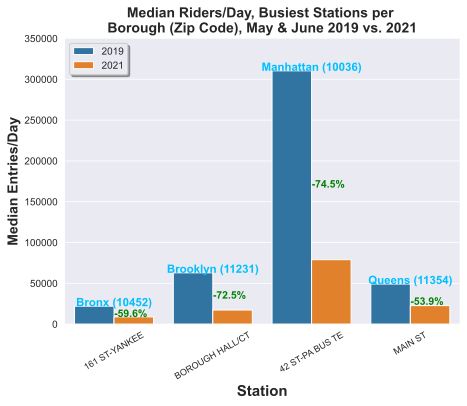

In [231]:
sns.set_style("darkgrid")

plot = sns.catplot(x='STATION_x', y='MEDIAN_DAILY_ENTRIES', 
                   hue='YEAR', data=plot_df, kind='bar', ci=None,
                   height=4.5, aspect=11.7/8.27, legend_out=False)

plt.title('Median Riders/Day, Busiest Stations per \nBorough (Zip Code), May & June 2019 vs. 2021', 
          fontdict={'weight': 'bold', 'fontsize': 14})
plt.xlabel("Station", fontdict={'weight': 'bold', 'size': 15})
plt.xticks(rotation=30, size=9)
plt.yticks(np.linspace(0, 3.5e5, 8))
plt.ylabel("Median Entries/Day", fontdict={'weight': 'bold', 'size': 14})
plt.legend(loc='upper left', shadow=True)

# This fancy labeling is courtesy of the following StackOverflow post:
#     https://stackoverflow.com/questions/39444665/add-data-labels-to-seaborn-factor-plot/55427207
for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h, # y coordinate of text
        '{} ({})'.format(plot_df.loc[i, 'BOROUGH'], plot_df.loc[i, 'ZIPCODE']),  # y label
        ha='center', 
        va='baseline', 
        fontweight='bold',
        color='deepskyblue',
        size=11.5)
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h*0.55, # y coordinate of text
        '{}%'.format(round(-100*(1 - plot_df.loc[i+4, 'MEDIAN_DAILY_ENTRIES']/
                                plot_df.loc[i, 'MEDIAN_DAILY_ENTRIES']), 1)),
        ha='left', 
        va='center', 
        fontweight='bold',
        color='green',
        size=10.5)
    if i > 2:
        break;